# Fichier: LECTURE ET ANALYSE DES CLUSTERS EN STOCK
### Importation des librairies

In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline

from tslearn.clustering import silhouette_score

from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km
from utils import k_shape as ks
from utils.statics_func import *

2.5.1


### Initialise la factory et créé les instances de Support de Series: ss.SeriesSupp

In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)

RG24 = ss.SeriesSupp(cwd, factory, "RG24")
RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\workspace_stage


### Importation des datasets depuis les fichiers de stockage csv

In [3]:
GW.import_dataset()
RG24.import_dataset()

Load csv_prepro\GW: Done
Load csv_prepro\RG\precipiation_RG: Done


### Création des instances de Clustering
Commenter ou décommenter pour choisir le cluster_GW voulu selon Kshape ou Kmean
* GW: Grand Water -> les piezomètres
* RG: Rain gauge -> les pluviomètres

In [4]:
#cluster_GW = km.Kmean(GW)
cluster_GW = ks.Kshape(GW)
cluster_RG = km.Kmean(RG24)

## Importation du fichier Pickles contenant le clustering voulu
### Veuillez renseigner le nom du fichier ci dessous

In [5]:
name_file = openfile_dialog()
cluster_GW.read_cluster(name_file[0])

In [6]:
#name_file = "Kshape_GW_[2011, 2012, 2013, 2014, 2015][1, 2, 3, 4, 5, 12]_True_5"
#cluster_GW.read_cluster("cluster\\29_06\\" + name_file + ".pkl")

## Affichage des cluster
* Prototypes en rouge
* informations en dessous
* repartition des objets dans les cluster

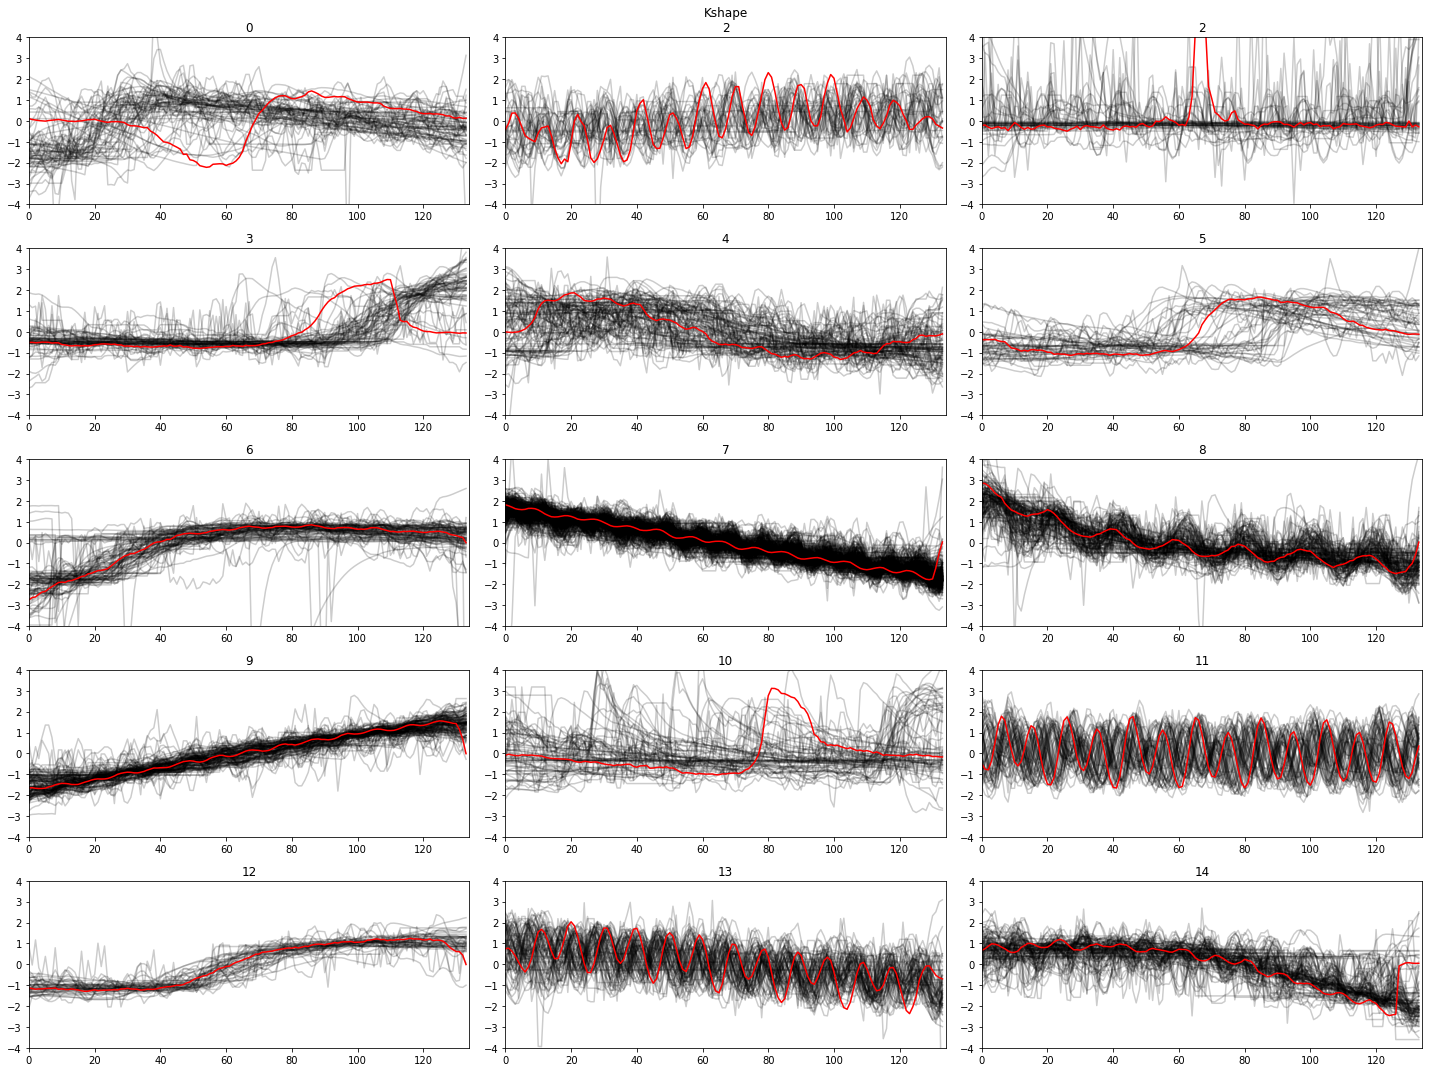

[2011, 2012, 2013, 2014, 2015]
[1, 2, 3, 4, 5, 12]
Weeks split: True
Normalized: True
min size of TS selected: 134
Sample size(0=None): 134
Algorithm used: Kshape
nb cluster: 15
Distance measure: shape
Rounded values: False

rounded values: False


Counter({4: 89,
         6: 81,
         7: 507,
         5: 44,
         0: 62,
         14: 98,
         2: 40,
         13: 71,
         3: 61,
         9: 128,
         8: 117,
         11: 61,
         1: 32,
         10: 62,
         12: 43})

tot obj: 1496


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
GW011,1,1,nan,1,nan,1,2,23,1,2,nan,1,1,9,1
GW015,1,nan,nan,3,5,3,2,16,nan,1,nan,nan,1,nan,4
GW082,1,nan,1,2,nan,nan,3,22,2,8,1,nan,1,nan,3
GW126,1,6,2,2,3,1,nan,nan,3,1,1,1,nan,3,2
GW190,2,nan,1,3,5,nan,nan,3,3,nan,4,nan,nan,1,2
GW201,nan,1,2,1,1,nan,7,6,2,6,nan,nan,1,nan,6
GW202,nan,2,nan,2,1,nan,2,21,nan,11,nan,nan,2,nan,4
GW203,1,2,nan,1,2,nan,2,20,nan,9,nan,nan,1,1,6
GW204,nan,nan,nan,1,2,nan,3,16,1,3,nan,nan,6,nan,5
GW205,nan,nan,3,1,5,nan,4,12,3,2,2,nan,3,nan,2


In [7]:
cluster_GW.ploter.plot_cluster_light()
cluster_GW.show_info()
print("rounded values: " + str(cluster_GW.ss.rounded))
cluster_GW.cluster_counter()
cluster_GW.counter
print("tot obj: " + str(len(cluster_GW.ts_clust)))
cluster_GW.capteur_parser()
cluster_GW.style_df("max", cluster_GW.get_captor_distribution_in_cluster())

In [8]:
cluster_GW.ploter.change_mode(3)
#cluster_GW.cluster_by_fullname

### Silhouette score cluster quality indice
could be huge and long computation due to massive dataset

In [9]:
#sil = silhouette_score(cluster_GW.ts, cluster_GW.ts_clust, metric="softdtw", metric_params = {"gamma_sdtw": .01})
#print("Silhouette score: " + str(sil))

## Analyse: n_obs est le numero du cluster à observer

### n_obs: numéro du cluster analysé 

In [10]:
n_obs = 4
cluster_GW.geo.plotly_3D(cluster_GW.cluster_by_name[n_obs])
#cluster_GW.geo.distance_matrix()
cluster_GW.ploter.plot_histo_2(n_obs)
cluster_GW.clust_hoverview(n_obs)

### Setup et affiche RG

In [11]:
cluster_RG.ss.reset_dataset()
cluster_RG.ss.years = cluster_GW.ss.years
cluster_RG.ss.months = cluster_GW.ss.months

In [12]:
cluster_RG.ss.split_data_years()
cluster_RG.ss.split_data_months()
#if cluster_GW.ss.days:
#    cluster_RG.ss.split_data_weeks()

In [13]:
cluster_RG.ploter.change_mode(3)
#cluster_RG.ploter.plot_scatter(cluster_RG.ss.tmp_dataset)

In [14]:
#for k, v in cluster_GW.ss.dataset.items():
#    print(k)

### Analyse un capteur en particulier

In [15]:
clts = cluster_GW.get_ts_by_captor("GW_234")

In [16]:
cluster_GW.ploter.plot_captor_cluster_cover(clts)

#### Cluster et RG

In [17]:
cluster_GW.geo.distance_dict()

TypeError: 'NoneType' object is not iterable

#### Pic detection

In [ ]:
y = cluster_RG.ss.dataset["24h_RG002"]["Valeur"].tolist()[50:200]
#y = cluster_RG.ss.dataset["24h_RG007"]
#y = cluster_RG.ss.normalize(y)["Valeur"].tolist()[:70]

In [ ]:
#y = np.array([1,1,1.1,1,0.9,1,1,1.1,1,0.9,1,1.1,1,1,0.9,1,1,1.1,1,1,1,1,1.1,0.9,1,1.1,1,1,0.9,
#       1,1.1,1,1,1.1,1,0.8,0.9,1,1.2,0.9,1,1,1.1,1.2,1,1.5,1,3,2,5,3,2,1,1,1,0.9,1,1,3,
#       2.6,4,3,3.2,2,1,1,0.8,4,4,2,2.5,1,1,1])

In [ ]:
lag = 10
threshold = 10
influence = 0.2

In [ ]:
# Run algo with settings from above
result = thresholding_algo(y, lag=lag, threshold=threshold, influence=influence)

In [ ]:
result["signals"]

In [ ]:
rcParams['figure.figsize'] = 15, 6
plt.plot(y)
plt.plot(result["signals"])